<a href="https://colab.research.google.com/github/Leon7422/PythonCollabProject/blob/main/Exploratory_data_analysis_for_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

#Створення БД

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##БД Countries

In [ ]:
countries_data = pd.read_csv("/content/drive/MyDrive/Mate_data/countries.csv")
empty_rows = countries_data[countries_data.isnull().any(axis=1)]
#print(empty_rows)
countries_data.dropna()
#В теорії можна видалити лише антарктику, так як наврядчи звідти були замовлення і вручну залишити намібію.
#Але хардкод не найкраща практика + намібія наврядчи саме та країна на яку йде фокус, тому нею жертвуємо
#print(countries_data.dtypes)
countries_data = countries_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
countries_data = countries_data.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
#print(countries_data.duplicated().sum())
countries_data.head()

,name,alpha-2,alpha-3,region,sub-region
0,afghanistan,af,afg,asia,southern asia
1,åland islands,ax,ala,europe,northern europe
2,albania,al,alb,europe,southern europe
3,algeria,dz,dza,africa,northern africa
4,american samoa,as,asm,oceania,polynesia


##БД Events

In [ ]:
events_data = pd.read_csv("/content/drive/MyDrive/Mate_data/events.csv")
empty_rows = events_data[events_data.isnull().any(axis=1)]
#print(empty_rows)
#В даному випадку нереально передбачити яка це країна, тому ставимо просто позначку без країни
#В майбутній аналітиці можна буде подивитись наскільки велика частка у нас без країн
events_data["Country Code"] = events_data["Country Code"].fillna("No Specified")
events_data["Order Date"] = pd.to_datetime(events_data["Order Date"])
events_data["Ship Date"] = pd.to_datetime(events_data["Ship Date"])
#print(events_data.dtypes)
events_data = events_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
events_data = events_data.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
#print(events_data.duplicated().sum())
#print(events_data.describe())
events_data.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,2014-10-08,2014-10-18,m,nor,2103,online,650.0,205.70,117.11
1,100983083,2016-08-11,2016-08-11,c,srb,2103,offline,1993.0,205.70,117.11
2,101025998,2014-07-18,2014-08-11,m,no specified,7940,online,4693.0,668.27,502.54
3,102230632,2017-05-13,2017-06-13,l,mne,2455,online,1171.0,109.28,35.84
4,103435266,2012-08-11,2012-09-18,h,srb,1270,offline,7648.0,47.45,31.79


##БД Products

In [ ]:
products_data = pd.read_csv("/content/drive/MyDrive/Mate_data/products.csv")
#print(products_data.isnull().values.any()) #Пустих значень немає
#print(products_data.dtypes)
products_data = products_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
products_data = products_data.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
#print(products_data.duplicated().sum())
products_data.head()

,id,item_type
0,2103,cereal
1,7940,household
2,2455,clothes
3,1270,beverages
4,8681,office supplies


##БД Merged

In [ ]:
merge_data = events_data.merge(products_data, left_on='Product ID', right_on='id', how="left")
merge_data = merge_data.merge(countries_data, left_on='Country Code', right_on='alpha-3', how="left")
merge_data.drop(columns=['id', 'alpha-3'], inplace=True)
merge_data["Unit Profit"] = merge_data['Unit Price'] - merge_data['Unit Cost']
merge_data["Total order profit"] = merge_data["Unit Profit"] * merge_data['Units Sold']
merge_data["Total order cost"] = merge_data["Unit Cost"] * merge_data['Units Sold']
merge_data["Processing time (days)"] = merge_data["Ship Date"] - merge_data["Order Date"]
merge_data['Processing time (days)'] = merge_data['Processing time (days)'].dt.days
merge_data["Total Sales"] = merge_data["Total order cost"] + merge_data["Total order profit"]
merge_data["Order Month"] = merge_data["Order Date"].dt.to_period("M").dt.to_timestamp()
merge_data["week_day"] = merge_data["Order Date"].dt.day_name()
print(merge_data.dtypes)
merge_data.head()

Order ID                           int64
Order Date                datetime64[ns]
Ship Date                 datetime64[ns]
Order Priority                    object
Country Code                      object
Product ID                         int64
Sales Channel                     object
Units Sold                       float64
Unit Price                       float64
Unit Cost                        float64
item_type                         object
name                              object
alpha-2                           object
region                            object
sub-region                        object
Unit Profit                      float64
Total order profit               float64
Total order cost                 float64
Processing time (days)             int64
Total Sales                      float64
Order Month               datetime64[ns]
week_day                          object
dtype: object


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,...,alpha-2,region,sub-region,Unit Profit,Total order profit,Total order cost,Processing time (days),Total Sales,Order Month,week_day
0,100640618,2014-10-08,2014-10-18,m,nor,2103,online,650.0,205.70,117.11,...,no,europe,northern europe,88.59,57583.50,76121.50,10,133705.00,2014-10-01,Wednesday
1,100983083,2016-08-11,2016-08-11,c,srb,2103,offline,1993.0,205.70,117.11,...,rs,europe,southern europe,88.59,176559.87,233400.23,0,409960.10,2016-08-01,Thursday
2,101025998,2014-07-18,2014-08-11,m,no specified,7940,online,4693.0,668.27,502.54,...,NaN,NaN,NaN,165.73,777770.89,2358420.22,24,3136191.11,2014-07-01,Friday
3,102230632,2017-05-13,2017-06-13,l,mne,2455,online,1171.0,109.28,35.84,...,me,europe,southern europe,73.44,85998.24,41968.64,31,127966.88,2017-05-01,Saturday
4,103435266,2012-08-11,2012-09-18,h,srb,1270,offline,7648.0,47.45,31.79,...,rs,europe,southern europe,15.66,119767.68,243129.92,38,362897.60,2012-08-01,Saturday


#Аналітика


##Код:

In [ ]:
print(merge_data["Order ID"].count()) #Кількість замовлень

1330


In [ ]:
print(merge_data["Total order profit"].sum()) # Загальний прибуток

501434459.0


In [ ]:
print(merge_data['Country Code'].nunique()-1) #Кількість унікальних країн де -1 це рядки без країн

45


In [ ]:
print(merge_data[merge_data["Country Code"] == "no specified"].shape[0]) #К-сть замовлень без вказаної країни

82


In [ ]:
print(merge_data[merge_data["Country Code"] == "no specified"]["Total order profit"].sum()) #Сума прибутку без вказаноъ країни

27725423.94


###Продажі по категоріях

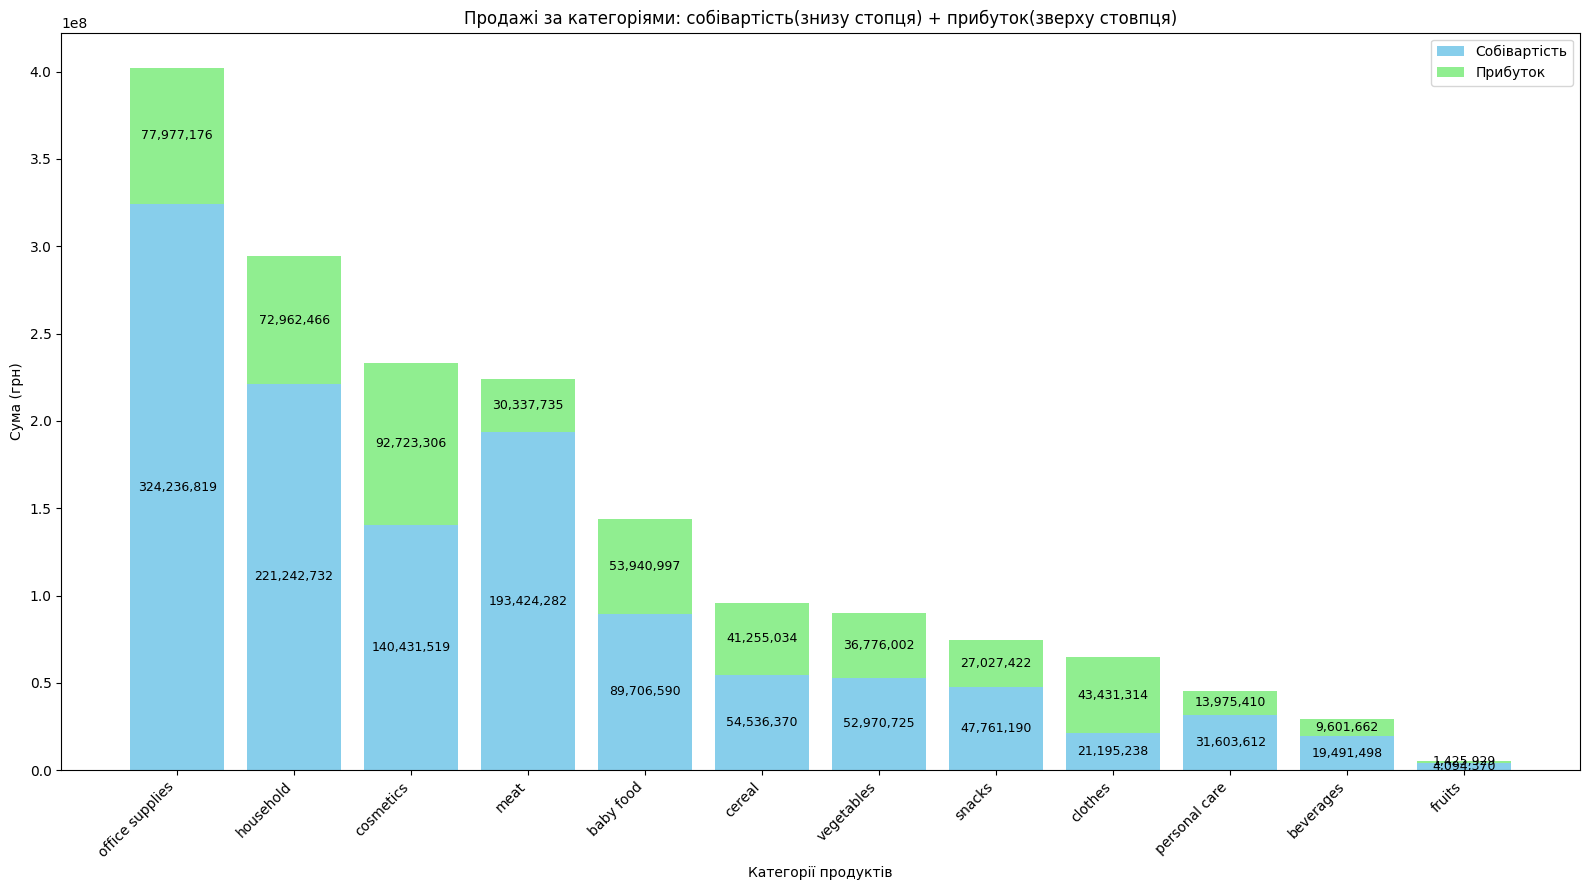

In [ ]:
grouped = merge_data.groupby('item_type').agg({
    'Total order cost': 'sum',
    'Total order profit': 'sum',
    'Total Sales': 'sum'
}).reset_index()
grouped = grouped.sort_values(by='Total Sales', ascending=False)

categories = grouped['item_type']
costs = grouped['Total order cost']
profits = grouped['Total order profit']

plt.figure(figsize=(16, 9))
plt.bar(categories, costs, label='Собівартість', color='skyblue')
plt.bar(categories, profits, bottom=costs, label='Прибуток', color='lightgreen')


for i in range(len(categories)):
    plt.text(i, costs.iloc[i] / 2,
             f'{int(costs.iloc[i]):,}',
             ha='center', va='center', fontsize=9, color='black')

    profit_center = costs.iloc[i] + profits.iloc[i] / 2
    plt.text(i, profit_center,
             f'{int(profits.iloc[i]):,}',
             ha='center', va='center', fontsize=9, color='black')

plt.xlabel('Категорії продуктів')
plt.ylabel('Сума (грн)')
plt.title('Продажі за категоріями: собівартість(знизу стопця) + прибуток(зверху стовпця)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

###Продажі по регіонах

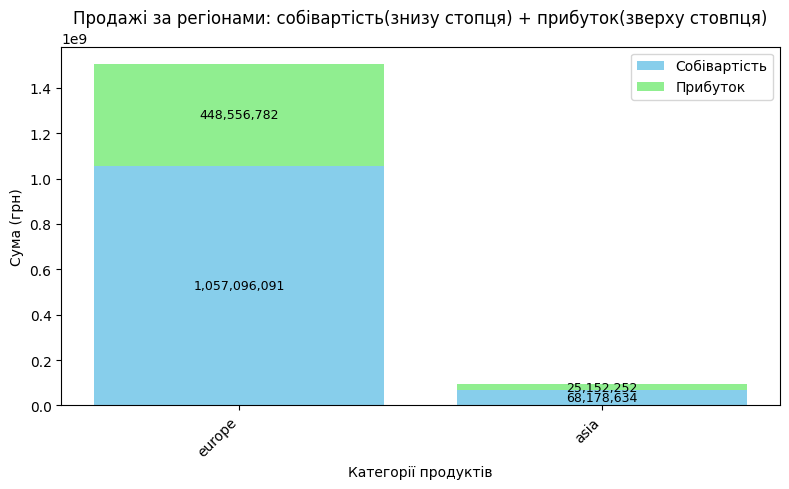

In [ ]:
grouped = merge_data.groupby('region').agg({
    'Total order cost': 'sum',
    'Total order profit': 'sum',
    'Total Sales': 'sum'
}).reset_index()
grouped = grouped.sort_values(by='Total Sales', ascending=False)

region = grouped['region']
costs = grouped['Total order cost']
profits = grouped['Total order profit']

plt.figure(figsize=(8, 5))
plt.bar(region, costs, label='Собівартість', color='skyblue')
plt.bar(region, profits, bottom=costs, label='Прибуток', color='lightgreen')


for i in range(len(region)):
    plt.text(i, costs.iloc[i] / 2,
             f'{int(costs.iloc[i]):,}',
             ha='center', va='center', fontsize=9, color='black')

    profit_center = costs.iloc[i] + profits.iloc[i] / 2
    plt.text(i, profit_center,
             f'{int(profits.iloc[i]):,}',
             ha='center', va='center', fontsize=9, color='black')

plt.xlabel('Категорії продуктів')
plt.ylabel('Сума (грн)')
plt.title('Продажі за регіонами: собівартість(знизу стопця) + прибуток(зверху стовпця)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

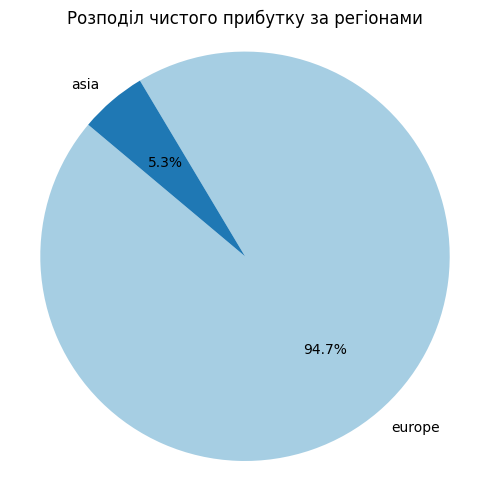

In [ ]:

grouped = merge_data.groupby('region').agg({
    'Total order profit': 'sum'
}).reset_index()

grouped = grouped.sort_values(by='Total order profit', ascending=False)

region = grouped['region']
profits = grouped['Total order profit']

plt.figure(figsize=(5, 5))
plt.pie(profits, labels=region, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Розподіл чистого прибутку за регіонами')
plt.axis('equal')  # Зберігає круглу форму

plt.tight_layout()
plt.show()


###Продажі по топ країнах

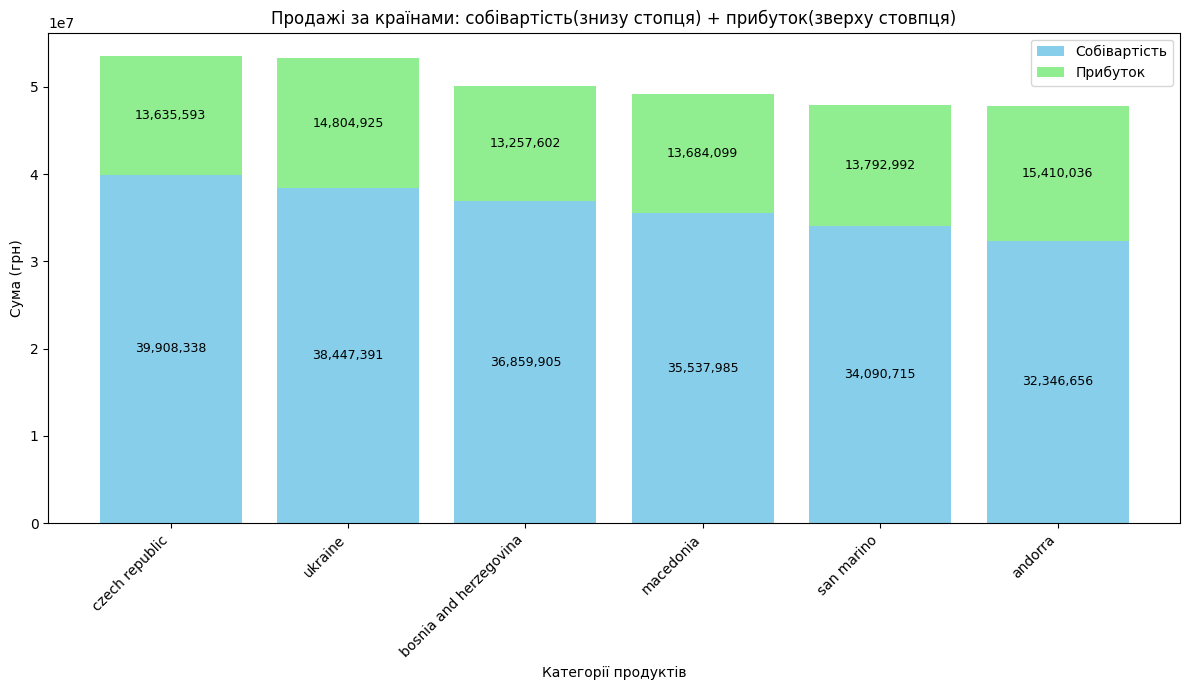

In [ ]:
grouped = merge_data.groupby('name').agg({
    'Total order cost': 'sum',
    'Total order profit': 'sum',
    'Total Sales': 'sum'
}).reset_index()
grouped = grouped.sort_values(by='Total Sales', ascending=False).head(6)

country = grouped['name']
costs = grouped['Total order cost']
profits = grouped['Total order profit']

plt.figure(figsize=(12, 7))
plt.bar(country, costs, label='Собівартість', color='skyblue')
plt.bar(country, profits, bottom=costs, label='Прибуток', color='lightgreen')


for i in range(len(country)):
    plt.text(i, costs.iloc[i] / 2,
             f'{int(costs.iloc[i]):,}',
             ha='center', va='center', fontsize=9, color='black')

    profit_center = costs.iloc[i] + profits.iloc[i] / 2
    plt.text(i, profit_center,
             f'{int(profits.iloc[i]):,}',
             ha='center', va='center', fontsize=9, color='black')

plt.xlabel('Категорії продуктів')
plt.ylabel('Сума (грн)')
plt.title('Продажі за країнами: собівартість(знизу стопця) + прибуток(зверху стовпця)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

###Продажі по каналах

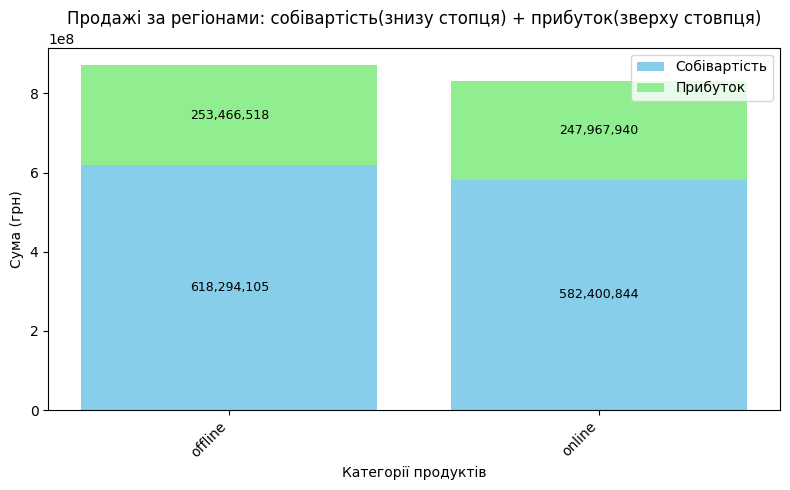

In [ ]:
grouped = merge_data.groupby('Sales Channel').agg({
    'Total order cost': 'sum',
    'Total order profit': 'sum',
    'Total Sales': 'sum'
}).reset_index()
grouped = grouped.sort_values(by='Total Sales', ascending=False)

sales_channel = grouped['Sales Channel']
costs = grouped['Total order cost']
profits = grouped['Total order profit']

plt.figure(figsize=(8, 5))
plt.bar(sales_channel, costs, label='Собівартість', color='skyblue')
plt.bar(sales_channel, profits, bottom=costs, label='Прибуток', color='lightgreen')


for i in range(len(sales_channel)):
    plt.text(i, costs.iloc[i] / 2,
             f'{int(costs.iloc[i]):,}',
             ha='center', va='center', fontsize=9, color='black')

    profit_center = costs.iloc[i] + profits.iloc[i] / 2
    plt.text(i, profit_center,
             f'{int(profits.iloc[i]):,}',
             ha='center', va='center', fontsize=9, color='black')

plt.xlabel('Категорії продуктів')
plt.ylabel('Сума (грн)')
plt.title('Продажі за регіонами: собівартість(знизу стопця) + прибуток(зверху стовпця)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

###Час опрацювання замовлення (по категоріях)

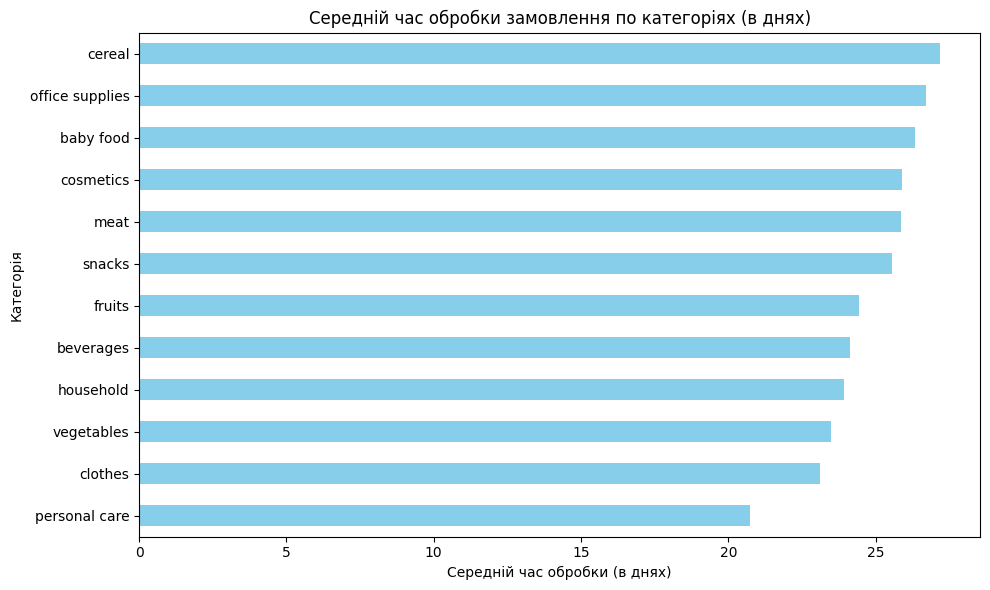

In [ ]:
avg_processing_time = merge_data.groupby('item_type')['Processing time (days)'].mean()

plt.figure(figsize=(10, 6))
avg_processing_time.sort_values().plot(kind='barh', color='skyblue')

plt.title('Середній час обробки замовлення по категоріях (в днях)')
plt.xlabel('Середній час обробки (в днях)')
plt.ylabel('Категорія')

plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

###Час опрацювання замовлення (по суб-регіонах)

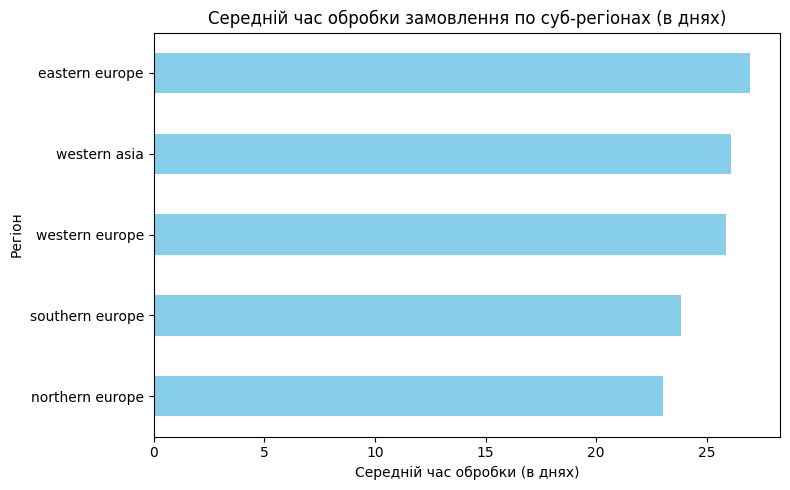

In [ ]:
avg_processing_time = merge_data.groupby('sub-region')['Processing time (days)'].mean()

plt.figure(figsize=(8, 5))
avg_processing_time.sort_values().plot(kind='barh', color='skyblue')

plt.title('Середній час обробки замовлення по суб-регіонах (в днях)')
plt.xlabel('Середній час обробки (в днях)')
plt.ylabel('Регіон')

plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

###Час опрацювання замовлення (по континентах)

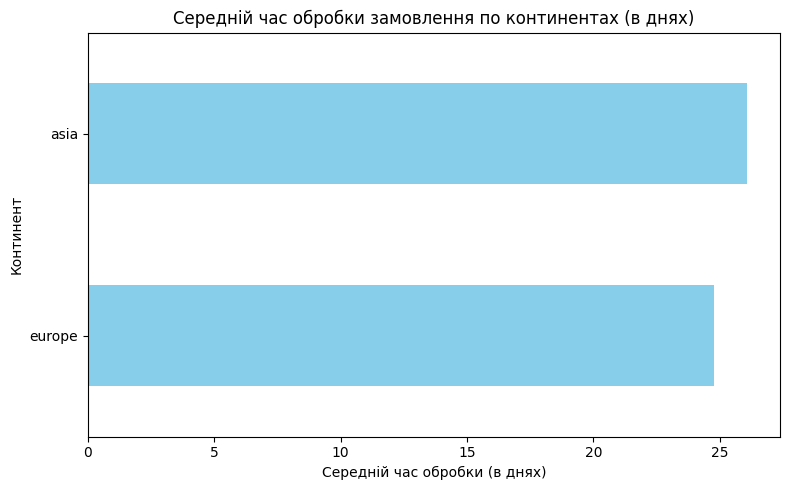

In [ ]:
avg_processing_time = merge_data.groupby('region')['Processing time (days)'].mean()

plt.figure(figsize=(8, 5))
avg_processing_time.sort_values().plot(kind='barh', color='skyblue')

plt.title('Середній час обробки замовлення по континентах (в днях)')
plt.xlabel('Середній час обробки (в днях)')
plt.ylabel('Континент')

plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

###Залежність прибутку від часу опрацювання замовлення

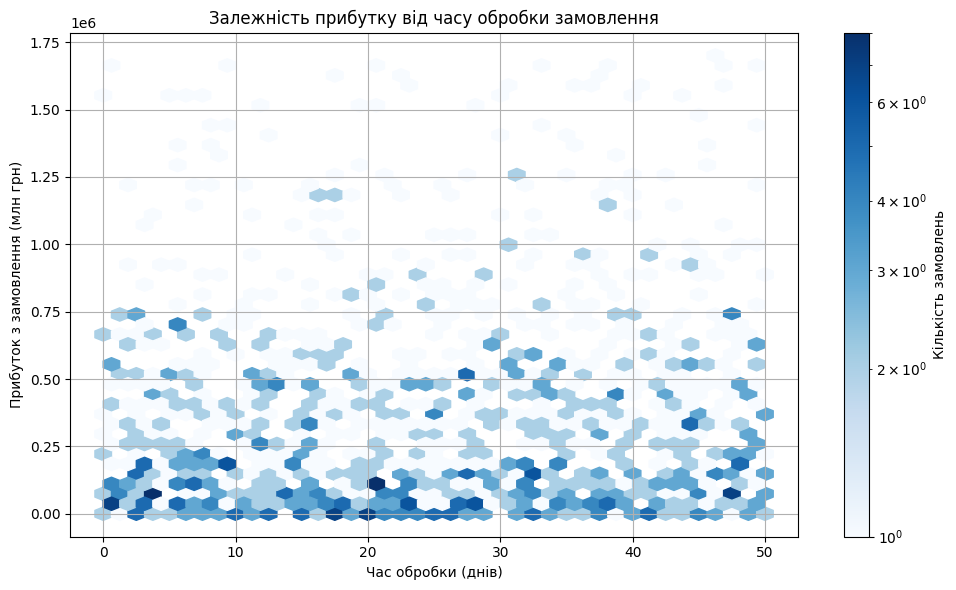

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(
    merge_data["Processing time (days)"],
    merge_data["Total order profit"],
    gridsize=40,        # кількість шестикутників (можна змінювати)
    cmap='Blues',       # палітра кольорів
    bins='log',         # логарифмічна шкала щільності (краще видно при великій варіативності)
    mincnt=1            # не показувати бін, якщо в ньому 0 точок
)

plt.colorbar(label='Кількість замовлень')
plt.title("Залежність прибутку від часу обробки замовлення")
plt.xlabel("Час обробки (днів)")
plt.ylabel("Прибуток з замовлення (млн грн)")
plt.grid(True)

plt.tight_layout()
plt.show()

###Динаміка продаж по категоріях

In [ ]:
top_categories = (
    merge_data.groupby('item_type')['Total Sales']
    .sum()
    .nlargest(5)
    .index
)

merge_data['item_type_grouped'] = merge_data['item_type'].where(
    merge_data['item_type'].isin(top_categories), 'Інше'
)

monthly_data = (
    merge_data
    .groupby(['Order Month', 'item_type_grouped'], as_index=False)['Total Sales']
    .sum()
    .sort_values(['item_type_grouped', 'Order Month'])
)

monthly_data['Total Sales Smoothed'] = (
    monthly_data
    .groupby('item_type_grouped')['Total Sales']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

fig = px.area(
    monthly_data,
    x="Order Month",
    y="Total Sales Smoothed",
    color="item_type_grouped",
    title="Згладжена динаміка продажів по категоріях",
    labels={
        "Order Month": "Місяць",
        "Total Sales Smoothed": "Сума продажів",
        "item_type_grouped": "Категорія"
    },
    hover_data={"Total Sales Smoothed": ":.2f"},
    width=1440,
    height=900,
)

fig.update_traces(
    hovertemplate="<b>Категорія:</b> %{fullData.name}<br>" +
                  "<b>Місяць:</b> %{x|%Y-%m}<br>" +
                  "<b>Продажі:</b> %{y:,.0f} грн"
)

fig.update_layout(
    yaxis_tickformat=',.0f',
    hovermode="x unified"
)

fig.show()

###Динаміка товарів по днях тижня

<ipython-input-116-c5430957b98c>:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



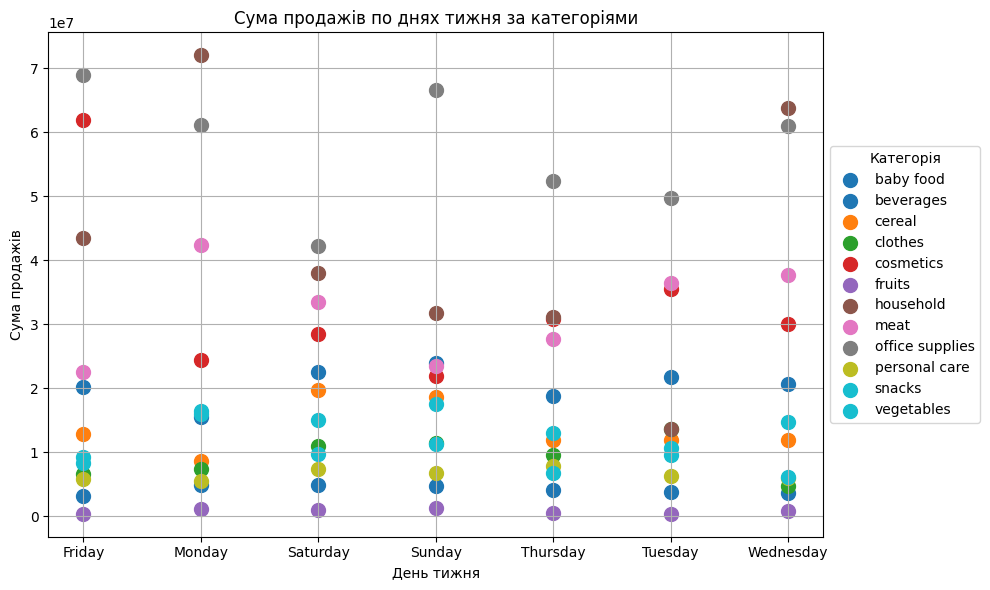

In [ ]:
grouped = merge_data.groupby(["week_day", "item_type"])["Total Sales"].sum().reset_index()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
grouped["week_day"] = pd.Categorical(grouped["week_day"], categories=day_order, ordered=True)

plt.figure(figsize=(10, 6))

categories = grouped["item_type"].unique()
colors = plt.cm.get_cmap("tab10", len(categories))

for idx, category in enumerate(categories):
    data = grouped[grouped["item_type"] == category]
    plt.scatter(
        data["week_day"],
        data["Total Sales"],
        label=category,
        color=colors(idx),
        s=100  # розмір точок
    )

plt.xlabel("День тижня")
plt.ylabel("Сума продажів")
plt.title("Сума продажів по днях тижня за категоріями")
plt.legend(title="Категорія")
plt.grid(True)
plt.legend(
    title="Категорія",
    loc="center left",
    bbox_to_anchor=(1.0, 0.5)
)
plt.tight_layout()
plt.show()

##Текстова аналітика

Після data cleaning було помічено максимально кількість проданих одиниць 9999. Є підозра що у рядках де є кількість 9999 щось пішло не по плану, по дана цифра виглядає як максимально допустиме значення  
  
Загальна к-сть замовлень - 1330  

Загальна сума прибутку - 501 434 459  
  
У вибірці є 45 різних країн  
  
82 замовлення без вказаної країни

27 725 423 - сума прибутку без вказаної країни  
  
Найбільше продаж має категорія - Office Suppliers, але не зважаючи на це найбільше прибутку приносить категорія - Cosmetics, хоча її загальні продажі майже вполовину менші  
  
Основним регіоном для продаж компнії є європа. Також є штучні продажі в регіон азія, можливо тільки відкрили представництво, можливо це якісь випадкові клієнти.  
  
Набільше відвантажень прийшлось на країну Чехія, в той час як Монако компанія відвантажила найменше  
  
Продажі по каналах онлайн та офлайн майже ідентичні, немає великої різниці між ними  
  
Найшвидше опрацьовуються замовлення з категорії особистий догляд, а найдовше з категорії злаки  
  
Якщо ж розглядати графік по залежності прибутків від часу обробки замовлення то прямої і чіткої залежності не видно. Але за допомоги попередніх графіків можна побачити що категорія косметика приносить нам найбільший прибуток, в той же час як цю категорію компанія і найшвидше обслуговє. Можливо далі "копати" в цьому напрямку щоб дізнатись про якісь інші інсайти.  
  
На рахунок динаміки продаж по категоріях, то графік виходить надто перевантажений через велику кількість категорій. В даному випадку краще розглядати не більше 4 категорій за раз.  
Але навіть на цьому перевантаженому графіку видно, що деякі категорії мають дуже сезонні продажі з переривами, а деякі постійний. Також видно загальні сильні скачки і спади продаж. Потрібно занурюватись більш точково в ці дані.  
  
Якщо ж говорити про продажі по днях тижня, то видно що є категорії які майже не залежать від днів тижня, є категорії які важко визначити чи залежать чи це просто випадкові скачки, а є категорії, як наприклад косметика, де чітко видно що найкращі продажі по цій категорії припадають на пятницю
  
